<h2><b>Bayesian Problem #01: Political Participation Among First-Time Voters</b></h2>

In a study about political engagement, 750 first-time voters aged 18 to 22 were surveyed after a national election, and 495 of them said they voted. The goal here is to estimate the actual voter turnout rate for this group using Bayesian inference, while also understanding how confident we can be in that estimate. We’re especially interested in figuring out the chance that the real turnout was over 65%, which would show strong civic participation among young voters.

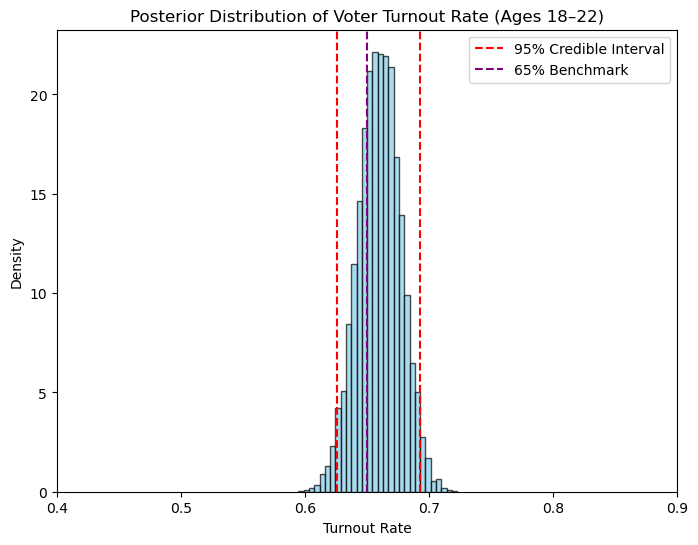

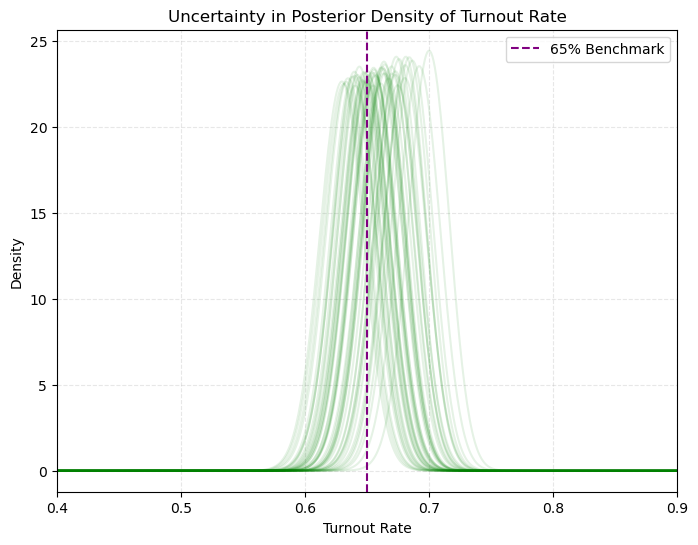


🗳️ Voter Turnout Estimate (Bayesian Inference)
• Mean turnout rate: 0.6596
• Mode turnout rate: 0.6600
• 95% credible interval: (0.626, 0.693)
• Probability turnout > 65%: 0.7157

📌 CONCLUSION:
The estimated turnout rate for first-time voters aged 18–22 is approximately 66.0%, with a 95% credible interval ranging from 62.6% to 69.3%. There is a 71.6% chance that the true turnout rate exceeded 65%, suggesting that civic engagement among young voters may be meaningfully strong.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Set seed for reproducibility
np.random.seed(42)

# Observed data
total_voters = 750
actual_voted = 495

# Prior: Beta(1, 1) (uniform prior)
prior_alpha = 1
prior_beta = 1

# Posterior parameters
posterior_alpha = prior_alpha + actual_voted
posterior_beta = prior_beta + (total_voters - actual_voted)

# Draw samples from the posterior distribution
posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)

# Calculate 95% credible interval
credible_interval = np.percentile(posterior_samples, [2.5, 97.5])

# First Graph: Posterior Distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(credible_interval[0], color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(credible_interval[1], color='red', linestyle='--')
plt.axvline(0.65, color='purple', linestyle='--', label='65% Benchmark')
plt.title('Posterior Distribution of Voter Turnout Rate (Ages 18–22)')
plt.xlabel('Turnout Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.4, 0.9)
plt.show()

# Second Graph: Posterior Density Overlay to Visualize Uncertainty
plt.figure(figsize=(8, 6))
x = np.linspace(0, 1, 1000)
for _ in range(50):
    alpha_sample = np.random.gamma(shape=posterior_alpha, scale=1.0)
    beta_sample = np.random.gamma(shape=posterior_beta, scale=1.0)
    y = beta.pdf(x, alpha_sample, beta_sample)
    plt.plot(x, y, color='green', alpha=0.1)

plt.axvline(0.65, color='purple', linestyle='--', label='65% Benchmark')
plt.title('Uncertainty in Posterior Density of Turnout Rate')
plt.xlabel('Turnout Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.4, 0.9)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Summary statistics
mean_turnout = posterior_alpha / (posterior_alpha + posterior_beta)
mode_turnout = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
prob_above_65 = np.mean(posterior_samples > 0.65)

# Print results
print("\n\033[1m🗳️ Voter Turnout Estimate (Bayesian Inference)\033[0m")
print(f"• Mean turnout rate: \033[94m{mean_turnout:.4f}\033[0m")
print(f"• Mode turnout rate: \033[94m{mode_turnout:.4f}\033[0m")
print(f"• 95% credible interval: \033[94m({credible_interval[0]:.3f}, {credible_interval[1]:.3f})\033[0m")
print(f"• Probability turnout > 65%: \033[92m{prob_above_65:.4f}\033[0m")

print("\n\033[1m📌 CONCLUSION:\033[0m")
print("\033[1mThe estimated turnout rate for first-time voters aged 18–22 is approximately {:.1f}%, "
      "with a 95% credible interval ranging from {:.1f}% to {:.1f}%. "
      "There is a {:.1f}% chance that the true turnout rate exceeded 65%, suggesting that civic engagement "
      "among young voters may be meaningfully strong.\033[0m"
      .format(mean_turnout * 100, credible_interval[0] * 100, credible_interval[1] * 100, prob_above_65 * 100))


<h2><b>Bayesian Problem #02: Chatbot Resolution Rate</b></h2>

You’re checking how well a customer service chatbot did during a test run where it handled 1,500 chats and managed to resolve 1,275 of them without passing the issue on to a human. The goal is to estimate how effective the chatbot really is and figure out how likely it is that its success rate is above 85% — a solid mark for great automated support.

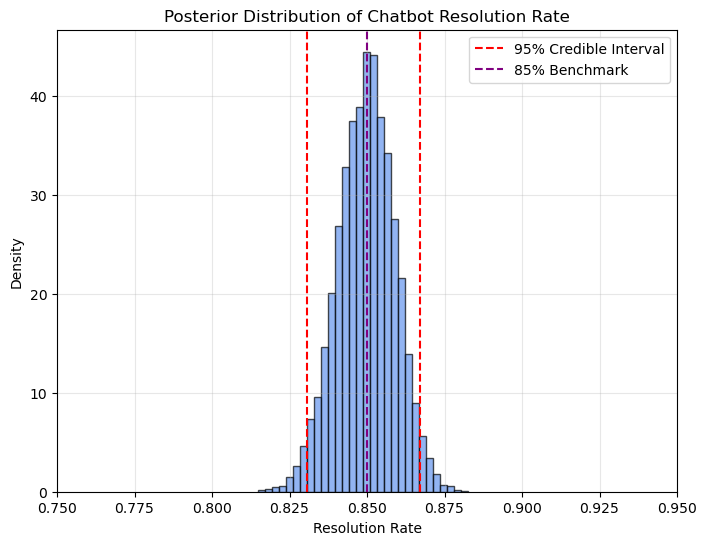

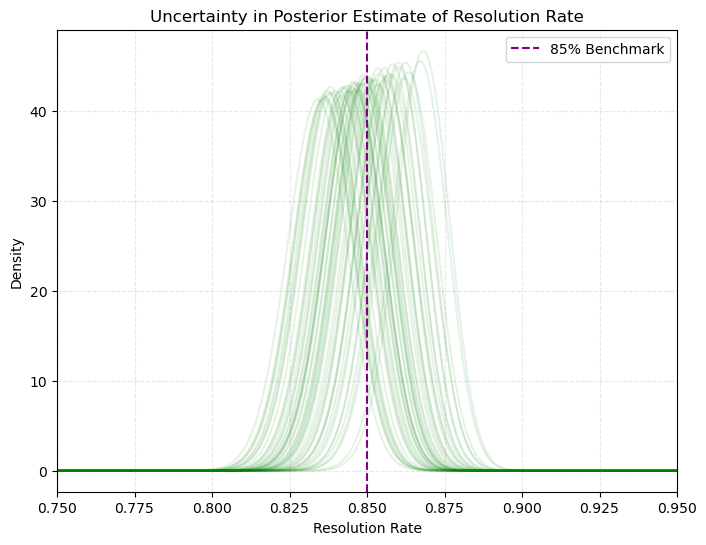


🤖 Chatbot Resolution Rate Estimate (Bayesian Inference)
• Mean resolution rate: 0.8495
• Mode resolution rate: 0.8500
• 95% credible interval: (0.831, 0.867)
• Probability resolution rate > 85%: 0.4911

📌 CONCLUSION:
Based on the pilot test, the chatbot has an estimated average resolution rate of 85.0%. With a 95% credible interval from 83.1% to 86.7%, there's a 49.1% chance the true resolution rate exceeds the 85% benchmark, suggesting excellent effectiveness for automated customer service handling.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Reproducibility
np.random.seed(42)

# Observed data
total_chats = 1500
resolved_by_bot = 1275

# Prior: uniform (Beta(1, 1))
prior_alpha = 1
prior_beta = 1

# Posterior parameters
posterior_alpha = prior_alpha + resolved_by_bot
posterior_beta = prior_beta + (total_chats - resolved_by_bot)

# Posterior samples
posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)

# 95% credible interval
credible_interval = np.percentile(posterior_samples, [2.5, 97.5])

# ----------------------------- #
# First Graph: Posterior Distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.axvline(credible_interval[0], color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(credible_interval[1], color='red', linestyle='--')
plt.axvline(0.85, color='purple', linestyle='--', label='85% Benchmark')
plt.title('Posterior Distribution of Chatbot Resolution Rate')
plt.xlabel('Resolution Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.75, 0.95)
plt.grid(alpha=0.3)
plt.show()

# ----------------------------- #
# Second Graph: Posterior Density Overlays for Uncertainty
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))
for _ in range(50):
    alpha_sample = np.random.gamma(shape=posterior_alpha, scale=1.0)
    beta_sample = np.random.gamma(shape=posterior_beta, scale=1.0)
    y = beta.pdf(x, alpha_sample, beta_sample)
    plt.plot(x, y, color='green', alpha=0.1)

plt.axvline(0.85, color='purple', linestyle='--', label='85% Benchmark')
plt.title('Uncertainty in Posterior Estimate of Resolution Rate')
plt.xlabel('Resolution Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.75, 0.95)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# ----------------------------- #
# Summary statistics
mean_rate = posterior_alpha / (posterior_alpha + posterior_beta)
mode_rate = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
prob_above_85 = np.mean(posterior_samples > 0.85)

# Print results
print("\n\033[1m🤖 Chatbot Resolution Rate Estimate (Bayesian Inference)\033[0m")
print(f"• Mean resolution rate: \033[94m{mean_rate:.4f}\033[0m")
print(f"• Mode resolution rate: \033[94m{mode_rate:.4f}\033[0m")
print(f"• 95% credible interval: \033[94m({credible_interval[0]:.3f}, {credible_interval[1]:.3f})\033[0m")
print(f"• Probability resolution rate > 85%: \033[92m{prob_above_85:.4f}\033[0m")

# ----------------------------- #
# Bold conclusion
print("\n\033[1m📌 CONCLUSION:\033[0m")
print("\033[1mBased on the pilot test, the chatbot has an estimated average resolution rate of {:.1f}%. "
      "With a 95% credible interval from {:.1f}% to {:.1f}%, there's a {:.1f}% chance the true resolution rate "
      "exceeds the 85% benchmark, suggesting excellent effectiveness for automated customer service handling.\033[0m"
      .format(mean_rate * 100, credible_interval[0] * 100, credible_interval[1] * 100, prob_above_85 * 100))


<h2><b>Bayesian Problem #03: Small Businesses Accepting Digital Payments</b></h2>

A local study surveyed 600 sari-sari store owners and found that 295 of them accept payments through GCash or other e-wallets. We want to estimate the true acceptance rate of e-wallet payments among these stores using Bayesian inference. Additionally, we want to see how confident we can be about this estimate and calculate the probability that the acceptance rate is above 50%, which would indicate that digital payments are becoming common in this community.

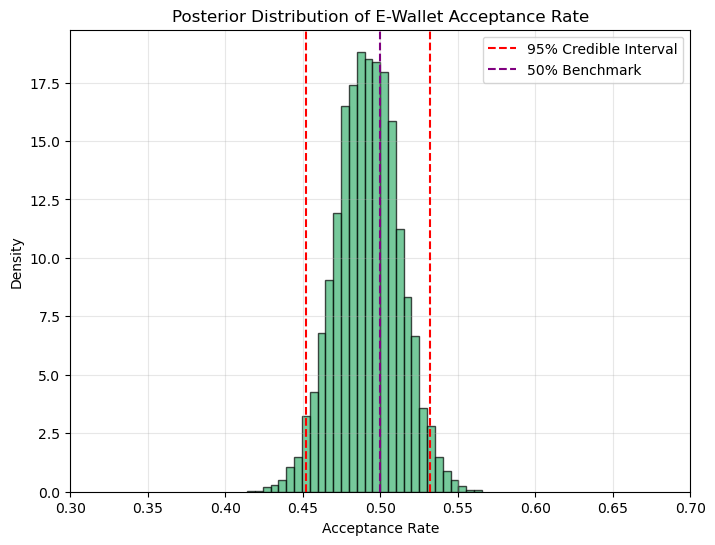

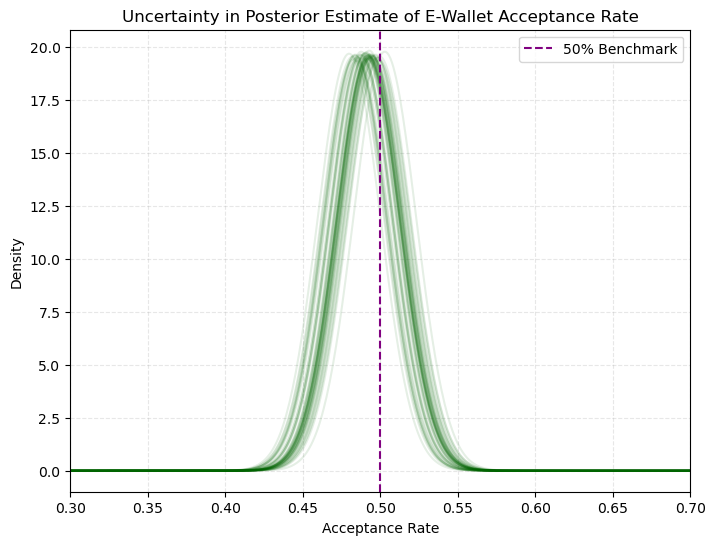


📱 E-Wallet Acceptance Rate Estimate (Bayesian Inference)
• Mean acceptance rate: 0.4917
• Mode acceptance rate: 0.4917
• 95% credible interval: (0.452, 0.532)
• Probability acceptance rate > 50%: 0.3504

📌 CONCLUSION:
The estimated acceptance rate of e-wallet payments among sari-sari store owners is approximately 49.2%. However, there is only a 35.0% probability that the true acceptance rate exceeds the 50% threshold. This suggests that fewer than half of the stores are currently adopting digital payment methods, and broader usage may still be emerging.


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(42)

total_stores = 600
accepted_ewallet = 295  # updated count

prior_alpha = 1
prior_beta = 1

posterior_alpha = prior_alpha + accepted_ewallet
posterior_beta = prior_beta + (total_stores - accepted_ewallet)

posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)
credible_interval = np.percentile(posterior_samples, [2.5, 97.5])

# First graph: posterior distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.axvline(credible_interval[0], color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(credible_interval[1], color='red', linestyle='--')
plt.axvline(0.50, color='purple', linestyle='--', label='50% Benchmark')
plt.title('Posterior Distribution of E-Wallet Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.3, 0.7)
plt.grid(alpha=0.3)
plt.show()

# Second graph: multiple Beta pdf curves to show uncertainty
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))

for _ in range(50):
    alpha_sample = np.random.normal(posterior_alpha, 5)
    beta_sample = np.random.normal(posterior_beta, 5)
    
    alpha_sample = max(alpha_sample, 0.1)
    beta_sample = max(beta_sample, 0.1)
    
    y = beta.pdf(x, alpha_sample, beta_sample)
    plt.plot(x, y, color='darkgreen', alpha=0.1)

plt.axvline(0.50, color='purple', linestyle='--', label='50% Benchmark')
plt.title('Uncertainty in Posterior Estimate of E-Wallet Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.3, 0.7)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

mean_rate = posterior_alpha / (posterior_alpha + posterior_beta)
mode_rate = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
prob_above_50 = np.mean(posterior_samples > 0.50)

print("\n\033[1m📱 E-Wallet Acceptance Rate Estimate (Bayesian Inference)\033[0m")
print(f"• Mean acceptance rate: \033[94m{mean_rate:.4f}\033[0m")
print(f"• Mode acceptance rate: \033[94m{mode_rate:.4f}\033[0m")
print(f"• 95% credible interval: \033[94m({credible_interval[0]:.3f}, {credible_interval[1]:.3f})\033[0m")
print(f"• Probability acceptance rate > 50%: \033[92m{prob_above_50:.4f}\033[0m")

print("\n\033[1m📌 CONCLUSION:\033[0m")
print(f"\033[1mThe estimated acceptance rate of e-wallet payments among sari-sari store owners is approximately {mean_rate*100:.1f}%. "
      f"However, there is only a {prob_above_50*100:.1f}% probability that the true acceptance rate exceeds the 50% threshold. "
      f"This suggests that fewer than half of the stores are currently adopting digital payment methods, and broader usage may still be emerging.\033[0m")
